C:\Users\HARISH\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


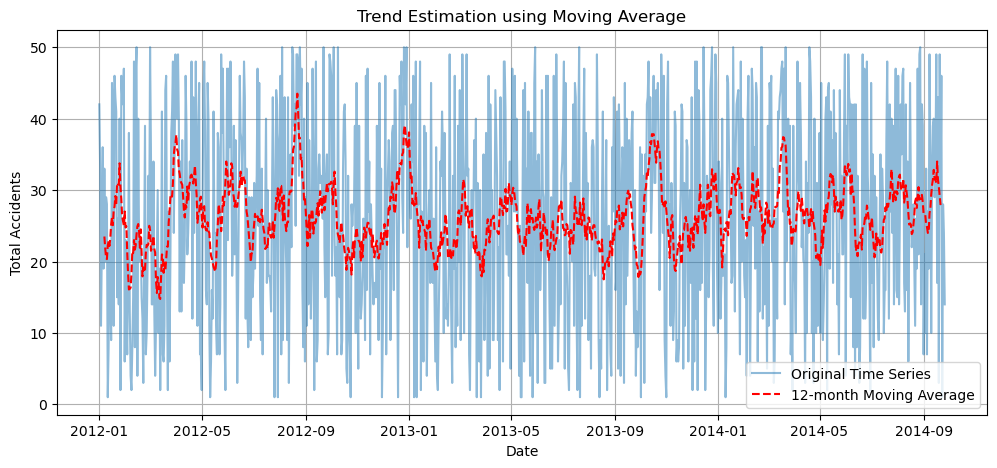

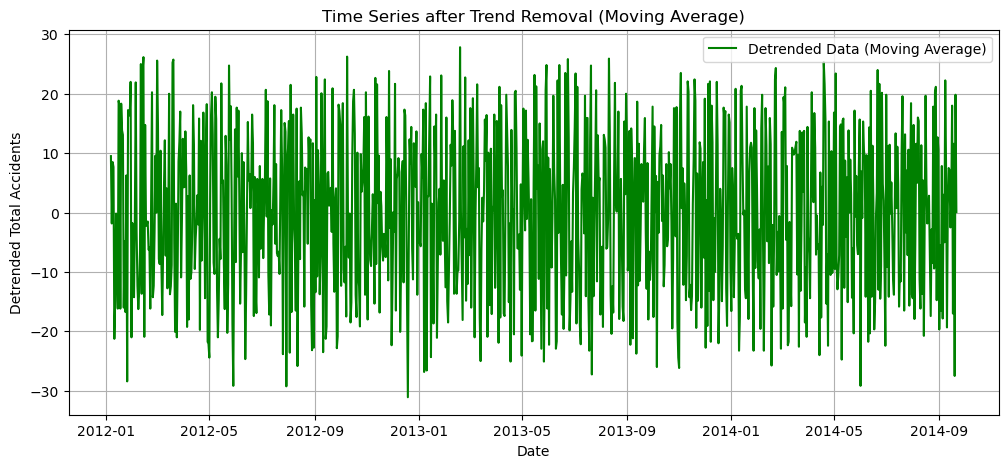

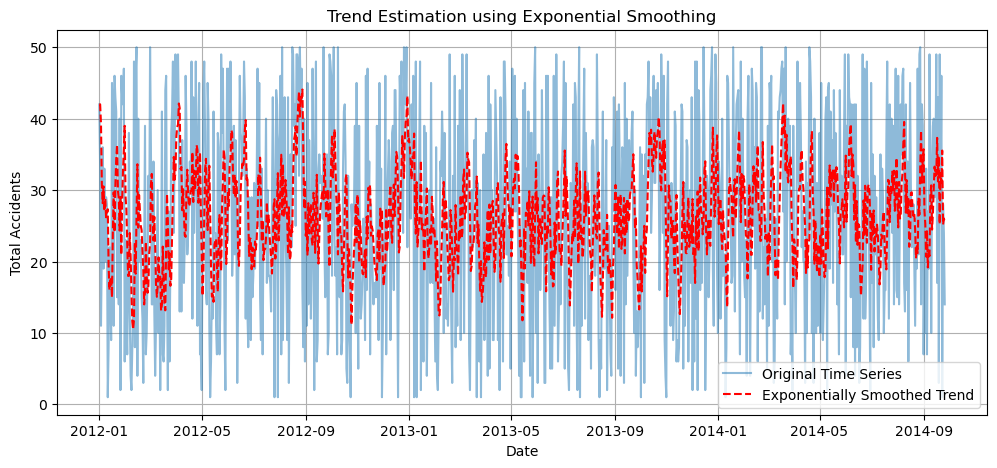

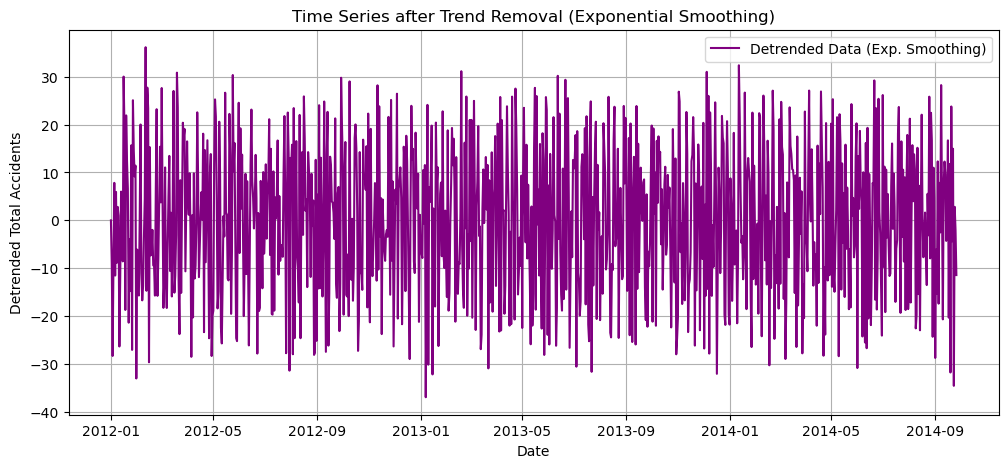

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Load the time series data
file_path = r"C:\Users\HARISH\Downloads\accident_time_series_1000_rows.csv"
accident_df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Verify column names
if "Total Accidents" not in accident_df.columns:
    raise ValueError("Column 'Total Accidents' not found in dataset. Check column names.")

# Select the "Total Accidents" column
time_series = accident_df["Total Accidents"].dropna()

### --- Trend Estimation Using Moving Average ---
window_size = 12  # 12-month moving average
moving_avg = time_series.rolling(window=window_size, center=True).mean()

# Detrended data (subtract moving average)
detrended_ma = time_series - moving_avg

### --- Trend Estimation Using Exponential Smoothing ---
alpha = 0.3  # Smoothing factor
exp_smooth = SimpleExpSmoothing(time_series).fit(smoothing_level=alpha, optimized=False)
smoothed_series = exp_smooth.fittedvalues

# Detrended data (subtract smoothed trend)
detrended_exp = time_series - smoothed_series

### --- Plot Original & Moving Average Trend ---
plt.figure(figsize=(12, 5))
plt.plot(time_series, label="Original Time Series", alpha=0.5)
plt.plot(moving_avg, label=f"{window_size}-month Moving Average", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Accidents")
plt.title("Trend Estimation using Moving Average")
plt.legend()
plt.grid(True)
plt.show()

### --- Plot Detrended Data (Moving Average) ---
plt.figure(figsize=(12, 5))
plt.plot(detrended_ma, label="Detrended Data (Moving Average)", color="green")
plt.xlabel("Date")
plt.ylabel("Detrended Total Accidents")
plt.title("Time Series after Trend Removal (Moving Average)")
plt.legend()
plt.grid(True)
plt.show()

### --- Plot Original & Exponential Smoothing Trend ---
plt.figure(figsize=(12, 5))
plt.plot(time_series, label="Original Time Series", alpha=0.5)
plt.plot(smoothed_series, label="Exponentially Smoothed Trend", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Accidents")
plt.title("Trend Estimation using Exponential Smoothing")
plt.legend()
plt.grid(True)
plt.show()

### --- Plot Detrended Data (Exponential Smoothing) ---
plt.figure(figsize=(12, 5))
plt.plot(detrended_exp, label="Detrended Data (Exp. Smoothing)", color="purple")
plt.xlabel("Date")
plt.ylabel("Detrended Total Accidents")
plt.title("Time Series after Trend Removal (Exponential Smoothing)")
plt.legend()
plt.grid(True)
plt.show()
